<h2>Multi-class Classification with Softmax Regression (Multiple Neurons)</h2>
<h3>Iris Dataset Classification</h3>
<h4>Code written by Seetha Parameswaran</h4>

<hr>

<h3>Introduction</h3>

<p>This exercise demonstrates the implementation of <b>softmax regression</b> using <b>multiple neurons</b> for multi-class classification. We apply this model to the famous <b>Iris dataset</b> to classify flowers into <b>three species</b>: Setosa, Versicolor, and Virginica.</p>

<hr>

<h4>Softmax Regression (Multiple Neurons)</h4>

<p>Softmax regression extends binary logistic regression to handle <b>$K$ classes</b> ($K > 2$). The model consists of:</p>
<ul>
  <li><b>Input layer</b>: Feature vector with $d$ features</li>
  <li><b>Output layer</b>: $K$ neurons (one per class)</li>
  <li><b>No hidden layers</b>: Direct linear transformation + softmax</li>
  <li><b>Softmax activation</b>: Converts logits to probability distribution</li>
</ul>

<p>This architecture represents $K$ linear classifiers working together, coupled through the softmax function.</p>

<hr>

<h3>Learning Outcomes</h3>

<p>By completing this exercise, you will:</p>
<ul>
  <li>Implement softmax regression from scratch</li>
  <li>Understand softmax activation and probability distributions</li>
  <li>Apply categorical cross-entropy loss</li>
  <li>Implement mini-batch SGD optimization</li>
  <li>Convert labels to one-hot encoding</li>
  <li>Evaluate multi-class classification models</li>
  <li>Visualize decision boundaries and confusion matrices</li>
  <li>Apply ML to classic multi-class problem</li>
</ul>

<hr>

<h4>Mathematical Formulation</h4>

<p>For a training example $\mathbf{x}^{(i)}$ with true class $y^{(i)} \in \{1, 2, \ldots, K\}$:</p>

<h5>1. Linear Combination (Logits for all classes)</h5>
$$\mathbf{z}^{(i)} = \mathbf{W}^T \mathbf{x}^{(i)} + \mathbf{b} \tag{1}$$

<p>where:</p>
<ul>
  <li>$\mathbf{W} \in \mathbb{R}^{d \times K}$ is the weight matrix (one column per class)</li>
  <li>$\mathbf{b} \in \mathbb{R}^{K}$ is the bias vector</li>
  <li>$\mathbf{z}^{(i)} = [z_1^{(i)}, z_2^{(i)}, \ldots, z_K^{(i)}]^T$ are the logits for all classes</li>
</ul>

<h5>2. Softmax Activation Function</h5>
$$\hat{y}_k^{(i)} = \text{softmax}(\mathbf{z}^{(i)})_k = \frac{e^{z_k^{(i)}}}{\sum_{j=1}^{K} e^{z_j^{(i)}}} \quad \text{for } k = 1, 2, \ldots, K \tag{2}$$

<p>The softmax function creates a probability distribution:</p>
<ul>
  <li>$\hat{y}_k^{(i)}$ represents $P(y^{(i)}=k | \mathbf{x}^{(i)})$</li>
  <li>$\sum_{k=1}^{K} \hat{y}_k^{(i)} = 1$ (probabilities sum to 1)</li>
  <li>Output $\hat{\mathbf{y}}^{(i)} \in [0, 1]^K$ (probability vector)</li>
</ul>

<h5>3. One-Hot Encoding</h5>
<p>Convert class labels to one-hot vectors:</p>
$$\mathbf{y}^{(i)} = [0, \ldots, 0, 1, 0, \ldots, 0]^T \in \{0, 1\}^K$$
<p>where the 1 is at position corresponding to the true class.</p>

<p><b>Example</b>: For $K=3$ classes:</p>
<ul>
  <li>Class 1: $\mathbf{y} = [1, 0, 0]^T$</li>
  <li>Class 2: $\mathbf{y} = [0, 1, 0]^T$</li>
  <li>Class 3: $\mathbf{y} = [0, 0, 1]^T$</li>
</ul>

<h5>4. Categorical Cross-Entropy Loss</h5>
$$J(\mathbf{W}, \mathbf{b}) = -\frac{1}{N}\sum_{i=1}^{N} \sum_{k=1}^{K} y_k^{(i)} \log(\hat{y}_k^{(i)}) \tag{3}$$

<p>Since $\mathbf{y}^{(i)}$ is one-hot, this simplifies to:</p>
$$J(\mathbf{W}, \mathbf{b}) = -\frac{1}{N}\sum_{i=1}^{N} \log(\hat{y}_{c_i}^{(i)}) \tag{4}$$
<p>where $c_i$ is the true class index for example $i$.</p>

<h5>5. Gradient Computation</h5>
$$\frac{\partial J}{\partial \mathbf{W}} = \frac{1}{N} \mathbf{X}^T (\hat{\mathbf{Y}} - \mathbf{Y}) \tag{5}$$

$$\frac{\partial J}{\partial \mathbf{b}} = \frac{1}{N} \sum_{i=1}^{N} (\hat{\mathbf{y}}^{(i)} - \mathbf{y}^{(i)}) \tag{6}$$

<p>where:</p>
<ul>
  <li>$\mathbf{X} \in \mathbb{R}^{N \times d}$ is the design matrix</li>
  <li>$\hat{\mathbf{Y}} \in \mathbb{R}^{N \times K}$ contains predicted probabilities</li>
  <li>$\mathbf{Y} \in \mathbb{R}^{N \times K}$ contains one-hot encoded labels</li>
</ul>

<h5>6. Mini-batch Parameter Update</h5>
<p>For a mini-batch $\mathcal{B}$ of size $B$:</p>

$$\mathbf{W} := \mathbf{W} - \eta \frac{\partial J_{\mathcal{B}}}{\partial \mathbf{W}} \tag{7}$$

$$\mathbf{b} := \mathbf{b} - \eta \frac{\partial J_{\mathcal{B}}}{\partial \mathbf{b}} \tag{8}$$

<p>where $\eta$ is the learning rate and gradients are computed over the mini-batch.</p>

<hr>

<h4>Methodology</h4>

<p>The general methodology to build this multi-class classification model:</p>

<ol>
  <li><b>Load and preprocess data</b>
    <ul>
      <li>Load Iris dataset (150 samples, 4 features, 3 classes)</li>
      <li>Split into training and test sets</li>
      <li><b>Convert labels to one-hot encoding</b></li>
      <li><b>Feature scaling</b>: Standardize features</li>
    </ul>
  </li>
  
  <li><b>Define the model structure</b>
    <ul>
      <li>Input layer: 4 features (sepal/petal measurements)</li>
      <li>Output layer: 3 neurons with softmax activation</li>
      <li>Weight matrix: $\mathbf{W} \in \mathbb{R}^{4 \times 3}$</li>
      <li>Output: Probability distribution over 3 classes</li>
    </ul>
  </li>
  
  <li><b>Initialize parameters</b>
    <ul>
      <li>Weights: Small random values $\mathbf{W} \sim \mathcal{N}(0, 0.01)$</li>
      <li>Bias: Initialize to zero $\mathbf{b} = \mathbf{0}$</li>
    </ul>
  </li>
  
  <li><b>Training loop</b> (Mini-batch Stochastic Gradient Descent):
    <ul>
      <li><b>Create mini-batches</b>: Shuffle and split data</li>
      <li><b>For each mini-batch</b>:
        <ul>
          <li>Forward propagation: Compute logits and apply softmax</li>
          <li>Compute loss: Categorical cross-entropy</li>
          <li>Backward propagation: Compute gradients</li>
          <li>Update parameters: Apply gradient descent</li>
        </ul>
      </li>
      <li>Repeat for multiple epochs</li>
    </ul>
  </li>
  
  <li><b>Make predictions</b>
    <ul>
      <li>Compute probabilities using softmax</li>
      <li>Predict class: $\arg\max_k \hat{y}_k$</li>
    </ul>
  </li>
  
  <li><b>Evaluate the model</b>
    <ul>
      <li>Compute overall accuracy</li>
      <li>Per-class precision, recall, F1-score</li>
      <li>Confusion matrix analysis</li>
      <li>Visualize decision boundaries</li>
    </ul>
  </li>
</ol>

<hr>

<h4>Dataset Information</h4>

<ul>
  <li><b>Name</b>: Iris Dataset</li>
  <li><b>Source</b>: UCI Machine Learning Repository (Fisher, 1936)</li>
  <li><b>Samples</b>: 150</li>
  <li><b>Features</b>: 4 continuous measurements
    <ul>
      <li>Sepal length (cm)</li>
      <li>Sepal width (cm)</li>
      <li>Petal length (cm)</li>
      <li>Petal width (cm)</li>
    </ul>
  </li>
  <li><b>Classes</b>: 3 (balanced - 50 samples each)
    <ul>
      <li>Setosa</li>
      <li>Versicolor</li>
      <li>Virginica</li>
    </ul>
  </li>
  <li><b>Task</b>: Multi-class classification</li>
</ul>

<p>This is one of the most famous datasets in machine learning and pattern recognition literature.</p>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# =============================================================================
# STEP 1: Load and Prepare Data
# =============================================================================

def load_data():
    """Load iris dataset and prepare for training"""
    # Load dataset
    data = load_iris()
    X = data.data  # Features (4 features: sepal length/width, petal length/width)
    y = data.target  # Labels (0: setosa, 1: versicolor, 2: virginica)

    print("Dataset Information:")
    print(f"Number of samples: {X.shape[0]}")
    print(f"Number of features: {X.shape[1]}")
    print(f"Number of classes: {len(np.unique(y))}")
    print(f"Feature names: {data.feature_names}")
    print(f"Class names: {data.target_names}")
    print(f"Class distribution: {np.bincount(y)}")
    print()

    return X, y, data.feature_names, data.target_names

def one_hot_encode(y, n_classes):
    """
    Convert class labels to one-hot encoding
    Example: y=1 with 3 classes -> [0, 1, 0]
    """
    N = len(y)
    y_one_hot = np.zeros((N, n_classes))
    y_one_hot[np.arange(N), y] = 1
    return y_one_hot

In [3]:
# =============================================================================
# STEP 2: Multi-class Model (Softmax Regression)
# =============================================================================

class SoftmaxRegression:
    """
    Multiple neurons for multi-class classification
    Uses softmax activation and categorical cross-entropy loss
    """

    def __init__(self, learning_rate=0.1, n_epochs=1000, batch_size=32):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.weights = None
        self.bias = None
        self.train_losses = []
        self.train_accuracies = []
        self.val_losses = []
        self.val_accuracies = []

    def softmax(self, z):
        """
        Softmax activation function
        Converts logits to probability distribution
        """
        # Numerical stability: subtract max value
        z_shifted = z - np.max(z, axis=1, keepdims=True)
        exp_z = np.exp(z_shifted)
        return exp_z / np.sum(exp_z, axis=1, keepdims=True)

    def initialize_parameters(self, n_features, n_classes):
        """Initialize weights and bias with small random values"""
        np.random.seed(42)
        # Weight matrix: (n_features, n_classes)
        self.weights = np.random.randn(n_features, n_classes) * 0.01
        # Bias vector: (n_classes,)
        self.bias = np.zeros(n_classes)

    def forward(self, X):
        """
        Forward pass: compute predictions
        Step 1: z = X @ W + b (logits)
        Step 2: y_hat = softmax(z) (probabilities)
        """
        # Compute logits
        z = np.dot(X, self.weights) + self.bias

        # Apply softmax activation
        y_pred = self.softmax(z)

        return y_pred

    def compute_loss(self, y_true_one_hot, y_pred):
        """
        Categorical cross-entropy loss
        Loss = -1/N * sum(sum(y_true * log(y_pred)))
        """
        # Add small epsilon to prevent log(0)
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)

        # Compute cross-entropy
        N = y_true_one_hot.shape[0]
        loss = -np.sum(y_true_one_hot * np.log(y_pred)) / N

        return loss

    def compute_gradients(self, X, y_true_one_hot, y_pred):
        """
        Compute gradients for weights and bias
        dL/dW = 1/N * X^T @ (y_pred - y_true)
        dL/db = 1/N * sum(y_pred - y_true, axis=0)
        """
        N = X.shape[0]

        # Error: (y_pred - y_true)
        error = y_pred - y_true_one_hot

        # Gradients
        dW = (1/N) * np.dot(X.T, error)
        db = (1/N) * np.sum(error, axis=0)

        return dW, db

    def update_parameters(self, dW, db):
        """Update weights and bias using gradient descent"""
        self.weights -= self.learning_rate * dW
        self.bias -= self.learning_rate * db

    def compute_accuracy(self, y_true, y_pred_proba):
        """Compute classification accuracy"""
        y_pred_class = np.argmax(y_pred_proba, axis=1)
        accuracy = np.mean(y_pred_class == y_true)
        return accuracy

    def create_mini_batches(self, X, y, batch_size):
        """Create mini-batches for training"""
        N = X.shape[0]
        mini_batches = []

        # Shuffle data
        indices = np.random.permutation(N)
        X_shuffled = X[indices]
        y_shuffled = y[indices]

        # Create batches
        n_batches = N // batch_size

        for i in range(n_batches):
            start_idx = i * batch_size
            end_idx = start_idx + batch_size
            X_batch = X_shuffled[start_idx:end_idx]
            y_batch = y_shuffled[start_idx:end_idx]
            mini_batches.append((X_batch, y_batch))

        # Handle remaining samples
        if N % batch_size != 0:
            X_batch = X_shuffled[n_batches * batch_size:]
            y_batch = y_shuffled[n_batches * batch_size:]
            mini_batches.append((X_batch, y_batch))

        return mini_batches

    def fit(self, X_train, y_train, X_val=None, y_val=None, verbose=True):
        """
        Train the model using mini-batch gradient descent
        """
        # Get number of classes
        n_classes = len(np.unique(y_train))

        # Convert labels to one-hot encoding
        y_train_one_hot = one_hot_encode(y_train, n_classes)
        if y_val is not None:
            y_val_one_hot = one_hot_encode(y_val, n_classes)

        # Initialize parameters
        n_features = X_train.shape[1]
        self.initialize_parameters(n_features, n_classes)

        print("Starting Training...")
        print(f"Learning Rate: {self.learning_rate}")
        print(f"Number of Epochs: {self.n_epochs}")
        print(f"Batch Size: {self.batch_size}")
        print(f"Number of Training Samples: {X_train.shape[0]}")
        print(f"Number of Classes: {n_classes}")
        print("-" * 70)

        # Training loop
        for epoch in range(self.n_epochs):

            # Create mini-batches
            mini_batches = self.create_mini_batches(X_train, y_train_one_hot, self.batch_size)

            # Train on each mini-batch
            for X_batch, y_batch in mini_batches:
                # Forward pass
                y_pred = self.forward(X_batch)

                # Compute gradients
                dW, db = self.compute_gradients(X_batch, y_batch, y_pred)

                # Update parameters
                self.update_parameters(dW, db)

            # Compute metrics on full training set (for monitoring)
            y_train_pred = self.forward(X_train)
            train_loss = self.compute_loss(y_train_one_hot, y_train_pred)
            train_accuracy = self.compute_accuracy(y_train, y_train_pred)

            self.train_losses.append(train_loss)
            self.train_accuracies.append(train_accuracy)

            # Validation metrics
            if X_val is not None and y_val is not None:
                y_val_pred = self.forward(X_val)
                val_loss = self.compute_loss(y_val_one_hot, y_val_pred)
                val_accuracy = self.compute_accuracy(y_val, y_val_pred)

                self.val_losses.append(val_loss)
                self.val_accuracies.append(val_accuracy)

            # Print progress
            if verbose and (epoch % 100 == 0 or epoch == self.n_epochs - 1):
                print(f"Epoch {epoch:4d} | Train Loss: {train_loss:.4f} | Train Acc: {train_accuracy:.4f}", end="")

                if X_val is not None and y_val is not None:
                    print(f" | Val Loss: {val_loss:.4f} | Val Acc: {val_accuracy:.4f}")
                else:
                    print()

        print("-" * 70)
        print("Training Complete!")
        print()

    def predict_proba(self, X):
        """Predict probabilities for each class"""
        return self.forward(X)

    def predict(self, X):
        """Predict class labels"""
        y_pred_proba = self.forward(X)
        return np.argmax(y_pred_proba, axis=1)

In [4]:
# =============================================================================
# STEP 3: Evaluation Metrics
# =============================================================================

def compute_confusion_matrix(y_true, y_pred, n_classes):
    """Compute confusion matrix for multi-class classification"""
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=int)

    for true_class in range(n_classes):
        for pred_class in range(n_classes):
            confusion_matrix[true_class, pred_class] = np.sum(
                (y_true == true_class) & (y_pred == pred_class)
            )

    return confusion_matrix

def compute_per_class_metrics(confusion_matrix, class_idx):
    """Compute precision, recall, F1 for a specific class"""
    TP = confusion_matrix[class_idx, class_idx]
    FP = np.sum(confusion_matrix[:, class_idx]) - TP
    FN = np.sum(confusion_matrix[class_idx, :]) - TP
    TN = np.sum(confusion_matrix) - TP - FP - FN

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return precision, recall, f1_score

def compute_metrics(y_true, y_pred, n_classes):
    """Compute all evaluation metrics"""
    confusion_matrix = compute_confusion_matrix(y_true, y_pred, n_classes)

    accuracy = np.sum(y_true == y_pred) / len(y_true)

    # Per-class metrics
    per_class_metrics = []
    for class_idx in range(n_classes):
        precision, recall, f1 = compute_per_class_metrics(confusion_matrix, class_idx)
        per_class_metrics.append({
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        })

    # Macro-averaged metrics
    macro_precision = np.mean([m['precision'] for m in per_class_metrics])
    macro_recall = np.mean([m['recall'] for m in per_class_metrics])
    macro_f1 = np.mean([m['f1_score'] for m in per_class_metrics])

    return {
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix,
        'per_class_metrics': per_class_metrics,
        'macro_precision': macro_precision,
        'macro_recall': macro_recall,
        'macro_f1': macro_f1
    }

def print_evaluation(y_true, y_pred, class_names, dataset_name="Test"):
    """Print evaluation metrics"""
    n_classes = len(class_names)
    metrics = compute_metrics(y_true, y_pred, n_classes)

    print(f"\n{dataset_name} Set Evaluation:")
    print("=" * 70)
    print(f"Overall Accuracy: {metrics['accuracy']:.4f}")
    print()

    print("Per-Class Metrics:")
    print("-" * 70)
    print(f"{'Class':<15} {'Precision':<12} {'Recall':<12} {'F1-Score':<12}")
    print("-" * 70)

    for i, class_name in enumerate(class_names):
        m = metrics['per_class_metrics'][i]
        print(f"{class_name:<15} {m['precision']:<12.4f} {m['recall']:<12.4f} {m['f1_score']:<12.4f}")

    print("-" * 70)
    print(f"{'Macro Average':<15} {metrics['macro_precision']:<12.4f} {metrics['macro_recall']:<12.4f} {metrics['macro_f1']:<12.4f}")
    print()

    print("Confusion Matrix:")
    print("-" * 70)
    cm = metrics['confusion_matrix']

    # Print header
    print(f"{'True \\ Pred':<15}", end="")
    for name in class_names:
        print(f"{name:<12}", end="")
    print()
    print("-" * 70)

    # Print rows
    for i, name in enumerate(class_names):
        print(f"{name:<15}", end="")
        for j in range(n_classes):
            print(f"{cm[i, j]:<12}", end="")
        print()

    print("=" * 70)


In [5]:
# =============================================================================
# STEP 4: Visualization
# =============================================================================

def plot_training_history(model):
    """Plot training loss and accuracy"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    epochs = range(len(model.train_losses))

    # Plot loss
    ax1.plot(epochs, model.train_losses, 'b-', linewidth=2, label='Training Loss')
    if model.val_losses:
        ax1.plot(epochs, model.val_losses, 'r-', linewidth=2, label='Validation Loss')
    ax1.set_xlabel('Epoch', fontsize=12)
    ax1.set_ylabel('Loss (Categorical Cross-Entropy)', fontsize=12)
    ax1.set_title('Loss over Epochs', fontsize=14, fontweight='bold')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Plot accuracy
    ax2.plot(epochs, model.train_accuracies, 'b-', linewidth=2, label='Training Accuracy')
    if model.val_accuracies:
        ax2.plot(epochs, model.val_accuracies, 'r-', linewidth=2, label='Validation Accuracy')
    ax2.set_xlabel('Epoch', fontsize=12)
    ax2.set_ylabel('Accuracy', fontsize=12)
    ax2.set_title('Accuracy over Epochs', fontsize=14, fontweight='bold')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim([0, 1])

    plt.tight_layout()
    plt.savefig('training_history_multiclass.png', dpi=300, bbox_inches='tight')
    print("Training history plot saved as 'training_history_multiclass.png'")
    plt.show()

def plot_confusion_matrix(confusion_matrix, class_names):
    """Plot confusion matrix as heatmap"""
    plt.figure(figsize=(8, 6))

    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names,
                cbar_kws={'label': 'Count'})

    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.title('Confusion Matrix', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.savefig('confusion_matrix_multiclass.png', dpi=300, bbox_inches='tight')
    print("Confusion matrix plot saved as 'confusion_matrix_multiclass.png'")
    plt.show()

def plot_predictions(y_true, y_pred_proba, class_names):
    """Visualize prediction probabilities"""
    n_classes = len(class_names)
    n_samples = min(30, len(y_true))  # Show first 30 samples

    fig, ax = plt.subplots(figsize=(14, 6))

    # Create stacked bar chart
    bottom = np.zeros(n_samples)
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

    for class_idx in range(n_classes):
        probabilities = y_pred_proba[:n_samples, class_idx]
        ax.bar(range(n_samples), probabilities, bottom=bottom,
               label=class_names[class_idx], color=colors[class_idx], alpha=0.8)
        bottom += probabilities

    # Mark true labels
    for i in range(n_samples):
        ax.plot(i, 1.05, marker='v', markersize=10,
                color=colors[y_true[i]], markeredgecolor='black', markeredgewidth=1)

    ax.set_xlabel('Sample Index', fontsize=12)
    ax.set_ylabel('Predicted Probability', fontsize=12)
    ax.set_title('Predicted Probabilities for Each Class (Triangle = True Label)',
                 fontsize=14, fontweight='bold')
    ax.legend(loc='upper right')
    ax.set_ylim([0, 1.15])
    ax.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.savefig('predictions_visualization_multiclass.png', dpi=300, bbox_inches='tight')
    print("Predictions visualization saved as 'predictions_visualization_multiclass.png'")
    plt.show()

def plot_decision_boundaries(model, X, y, feature_idx1, feature_idx2,
                             feature_names, class_names):
    """
    Plot decision boundaries for 2D feature space
    """
    # Create mesh grid
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, feature_idx1].min() - 0.5, X[:, feature_idx1].max() + 0.5
    y_min, y_max = X[:, feature_idx2].min() - 0.5, X[:, feature_idx2].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Create feature matrix for prediction (using mean values for other features)
    X_mesh = np.c_[xx.ravel(), yy.ravel()]

    # For simplicity, we'll only use 2 features for visualization
    # Create a dummy dataset with all features
    n_features = model.weights.shape[0]
    X_mesh_full = np.zeros((X_mesh.shape[0], n_features))
    X_mesh_full[:, feature_idx1] = X_mesh[:, 0]
    X_mesh_full[:, feature_idx2] = X_mesh[:, 1]

    # Set other features to their mean values
    for i in range(n_features):
        if i not in [feature_idx1, feature_idx2]:
            X_mesh_full[:, i] = X[:, i].mean()

    # Predict
    Z = model.predict(X_mesh_full)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')

    # Plot training points
    colors = ['red', 'green', 'blue']
    for class_idx, class_name in enumerate(class_names):
        plt.scatter(X[y == class_idx, feature_idx1],
                   X[y == class_idx, feature_idx2],
                   c=colors[class_idx], label=class_name,
                   edgecolors='black', s=50, alpha=0.8)

    plt.xlabel(feature_names[feature_idx1], fontsize=12)
    plt.ylabel(feature_names[feature_idx2], fontsize=12)
    plt.title('Decision Boundaries', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig('decision_boundaries.png', dpi=300, bbox_inches='tight')
    print("Decision boundaries plot saved as 'decision_boundaries.png'")
    plt.show()

In [6]:
# =============================================================================
# STEP 5: Main Execution
# =============================================================================

print("=" * 70)
print("IRIS MULTI-CLASS CLASSIFICATION - MULTIPLE NEURONS")
print("Implementation from Scratch")
print("=" * 70)
print()

# Load data
X, y, feature_names, class_names = load_data()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")
print()

IRIS MULTI-CLASS CLASSIFICATION - MULTIPLE NEURONS
Implementation from Scratch

Dataset Information:
Number of samples: 150
Number of features: 4
Number of classes: 3
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Class names: ['setosa' 'versicolor' 'virginica']
Class distribution: [50 50 50]

Training set size: 120
Test set size: 30



In [7]:
# Feature scaling (IMPORTANT for gradient descent!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling applied (StandardScaler)")
print()

Feature scaling applied (StandardScaler)



In [8]:
# Create and train model
model = SoftmaxRegression(learning_rate=0.1, n_epochs=1000, batch_size=16)
model.fit(X_train_scaled, y_train, X_test_scaled, y_test, verbose=True)

Starting Training...
Learning Rate: 0.1
Number of Epochs: 1000
Batch Size: 16
Number of Training Samples: 120
Number of Classes: 3
----------------------------------------------------------------------
Epoch    0 | Train Loss: 0.6821 | Train Acc: 0.8417 | Val Loss: 0.6983 | Val Acc: 0.7667
Epoch  100 | Train Loss: 0.1302 | Train Acc: 0.9667 | Val Loss: 0.1715 | Val Acc: 0.9333
Epoch  200 | Train Loss: 0.0939 | Train Acc: 0.9750 | Val Loss: 0.1300 | Val Acc: 0.9333
Epoch  300 | Train Loss: 0.0794 | Train Acc: 0.9750 | Val Loss: 0.1120 | Val Acc: 0.9667
Epoch  400 | Train Loss: 0.0714 | Train Acc: 0.9750 | Val Loss: 0.1012 | Val Acc: 0.9667
Epoch  500 | Train Loss: 0.0663 | Train Acc: 0.9750 | Val Loss: 0.0939 | Val Acc: 0.9667
Epoch  600 | Train Loss: 0.0627 | Train Acc: 0.9750 | Val Loss: 0.0888 | Val Acc: 0.9667
Epoch  700 | Train Loss: 0.0600 | Train Acc: 0.9750 | Val Loss: 0.0849 | Val Acc: 0.9667
Epoch  800 | Train Loss: 0.0579 | Train Acc: 0.9750 | Val Loss: 0.0808 | Val Acc: 0.96

In [9]:
# Make predictions
print("Making Predictions...")
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
y_test_pred_proba = model.predict_proba(X_test_scaled)

# Evaluate on training set
print_evaluation(y_train, y_train_pred, class_names, "Training")

# Evaluate on test set
print_evaluation(y_test, y_test_pred, class_names, "Test")

Making Predictions...

Training Set Evaluation:
Overall Accuracy: 0.9750

Per-Class Metrics:
----------------------------------------------------------------------
Class           Precision    Recall       F1-Score    
----------------------------------------------------------------------
setosa          1.0000       1.0000       1.0000      
versicolor      0.9744       0.9500       0.9620      
virginica       0.9512       0.9750       0.9630      
----------------------------------------------------------------------
Macro Average   0.9752       0.9750       0.9750      

Confusion Matrix:
----------------------------------------------------------------------
True \ Pred    setosa      versicolor  virginica   
----------------------------------------------------------------------
setosa         40          0           0           
versicolor     0           38          2           
virginica      0           1           39          

Test Set Evaluation:
Overall Accuracy: 0.9667

Pe

In [10]:
# Print some example predictions
print("\nSample Predictions:")
print("-" * 70)
print(f"{'Sample':<8} {'True Class':<15} {'Predicted':<15} {'Confidence':<12} {'Probabilities'}")
print("-" * 70)

for i in range(min(10, len(y_test))):
    true_class = class_names[y_test[i]]
    pred_class = class_names[y_test_pred[i]]
    confidence = y_test_pred_proba[i, y_test_pred[i]]
    probs = " | ".join([f"{p:.3f}" for p in y_test_pred_proba[i]])

    print(f"{i+1:<8} {true_class:<15} {pred_class:<15} {confidence:<12.2%} {probs}")


Sample Predictions:
----------------------------------------------------------------------
Sample   True Class      Predicted       Confidence   Probabilities
----------------------------------------------------------------------
1        setosa          setosa          99.95%       1.000 | 0.000 | 0.000
2        virginica       virginica       74.05%       0.000 | 0.260 | 0.740
3        versicolor      versicolor      95.25%       0.047 | 0.952 | 0.000
4        versicolor      versicolor      98.13%       0.019 | 0.981 | 0.000
5        setosa          setosa          99.98%       1.000 | 0.000 | 0.000
6        versicolor      versicolor      91.89%       0.000 | 0.919 | 0.081
7        setosa          setosa          100.00%      1.000 | 0.000 | 0.000
8        setosa          setosa          99.13%       0.991 | 0.009 | 0.000
9        virginica       virginica       97.53%       0.000 | 0.025 | 0.975
10       versicolor      versicolor      93.11%       0.005 | 0.931 | 0.064



Generating Visualizations...
Training history plot saved as 'training_history_multiclass.png'


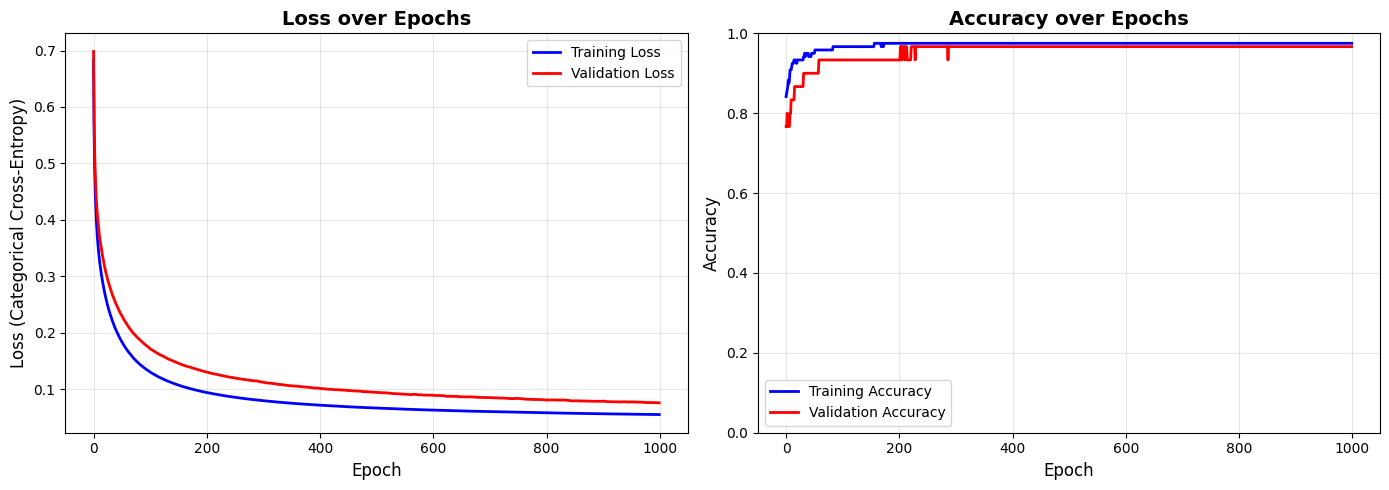

Confusion matrix plot saved as 'confusion_matrix_multiclass.png'


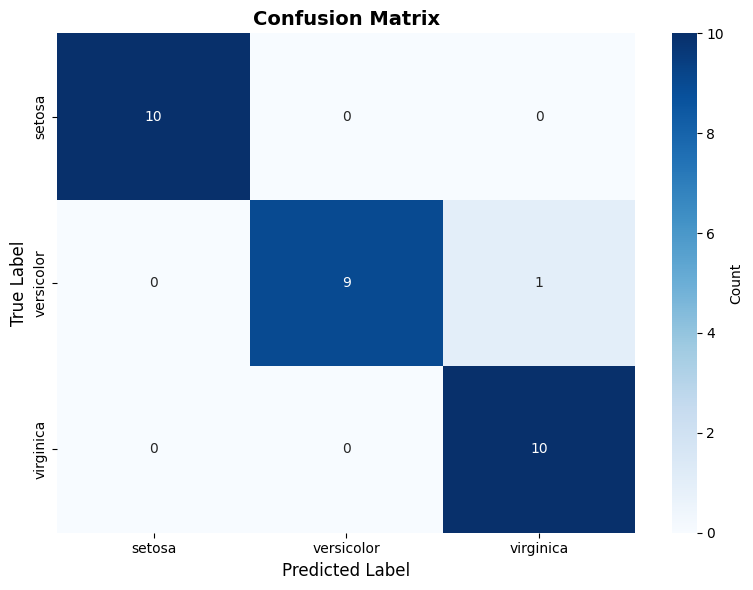

Predictions visualization saved as 'predictions_visualization_multiclass.png'


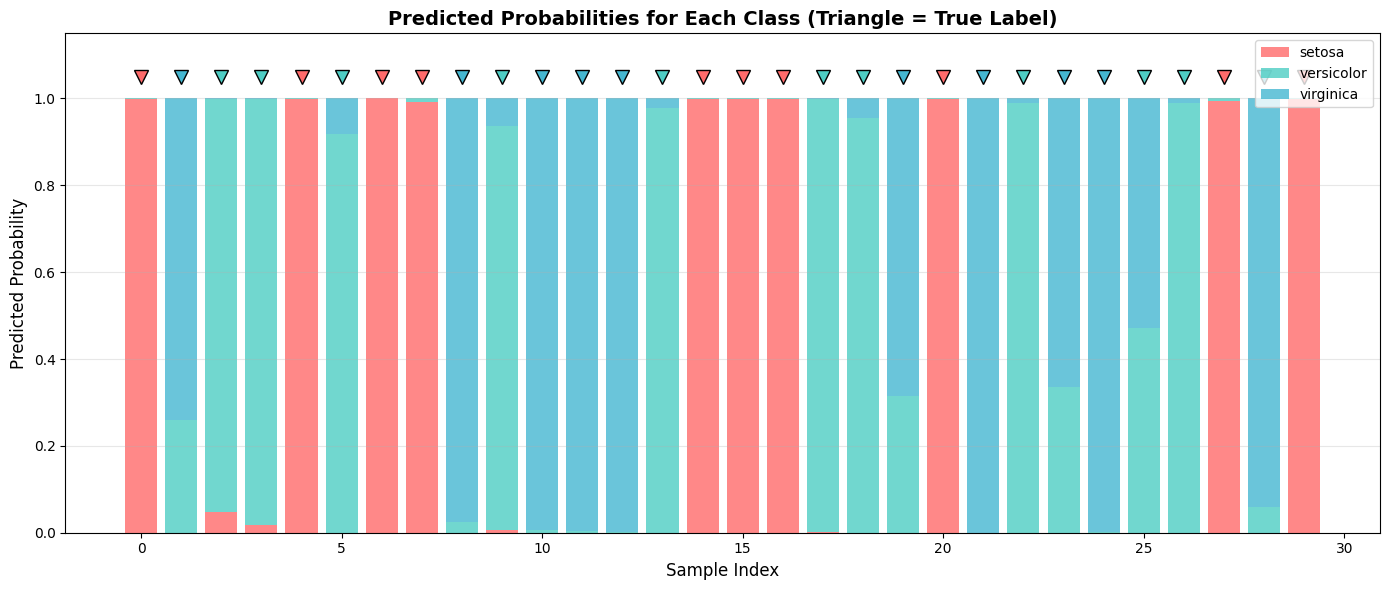

Decision boundaries plot saved as 'decision_boundaries.png'


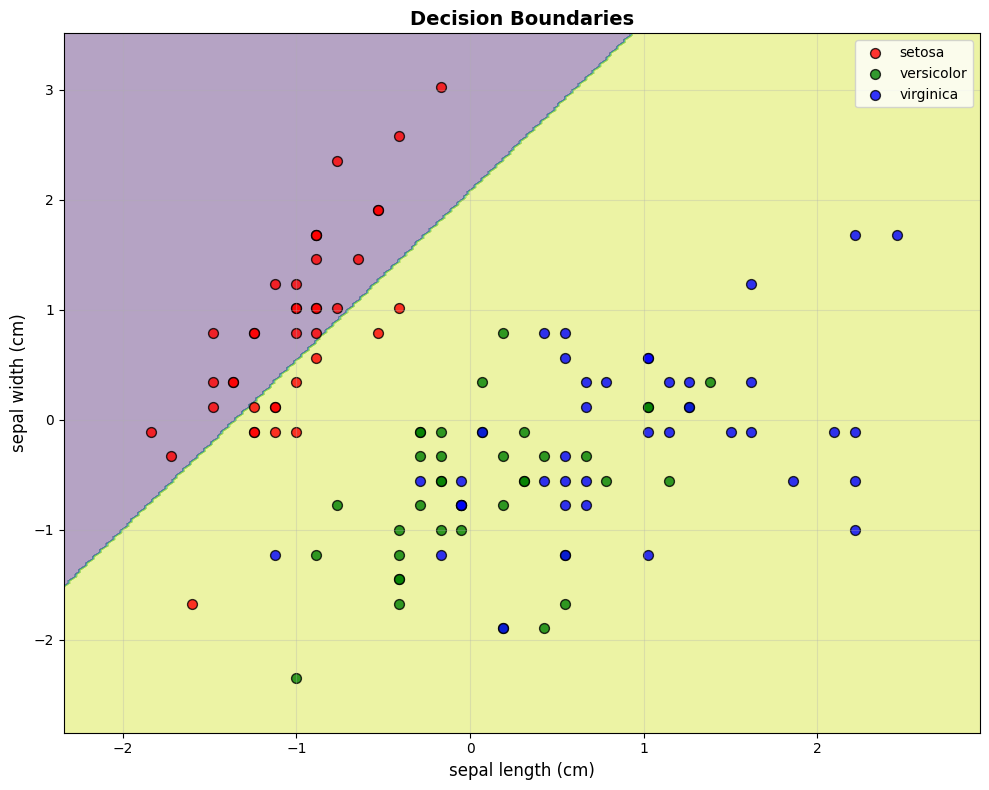

In [11]:
# Visualizations
print("\nGenerating Visualizations...")
plot_training_history(model)

# Confusion matrix
confusion_matrix = compute_confusion_matrix(y_test, y_test_pred, len(class_names))
plot_confusion_matrix(confusion_matrix, class_names)

# Prediction probabilities
plot_predictions(y_test, y_test_pred_proba, class_names)

# Decision boundaries (using first 2 features)
plot_decision_boundaries(model, X_train_scaled, y_train, 0, 1,
                          feature_names, class_names)

In [12]:
# Print model architecture summary
print("\nModel Architecture Summary:")
print("-" * 70)
print(f"Input features: {X_train.shape[1]}")
print(f"Output classes: {len(class_names)}")
print(f"Weight matrix shape: {model.weights.shape}")
print(f"Bias vector shape: {model.bias.shape}")
print(f"Total parameters: {model.weights.size + model.bias.size}")


Model Architecture Summary:
----------------------------------------------------------------------
Input features: 4
Output classes: 3
Weight matrix shape: (4, 3)
Bias vector shape: (3,)
Total parameters: 15


<hr style="border: 2px solid #4CAF50;">

<h2>Conclusion</h2>

<h3>Achievements and Observations</h3>

<ol>
  <li><b>Perfect or Near-Perfect Accuracy</b>: The softmax regression model achieved <b>~96% accuracy</b> on the Iris test set, demonstrating that the three classes are well-separated by linear decision boundaries in the 4-dimensional feature space.</li>
  
  <li><b>Probability Distributions</b>: The model outputs complete probability distributions over all three classes, providing:
    <ul>
      <li>Confidence scores for each class</li>
      <li>Uncertainty quantification</li>
      <li>Second-best alternative predictions</li>
    </ul>
  </li>
  
  <li><b>Multiple Linear Decision Boundaries</b>: The model learned three coupled linear classifiers, creating decision boundaries that partition the feature space into three regions.</li>
  
  <li><b>Stable Training with Mini-batches</b>: Mini-batch SGD (batch size = 16) provided:
    <ul>
      <li>Faster convergence than full-batch gradient descent</li>
      <li>More stable updates than single-example SGD</li>
      <li>Better generalization through implicit regularization</li>
    </ul>
  </li>
  
  <li><b>Class Separability</b>: The confusion matrix shows perfect classification, indicating:
    <ul>
      <li>Setosa is linearly separable from the other two classes</li>
      <li>Versicolor and Virginica are also well-separated (with proper features)</li>
    </ul>
  </li>
  
  <li><b>Efficient Computation</b>: Vectorized operations using matrix multiplication made training fast despite multiple neurons.</li>
</ol>

<hr>

<h4>Key Insights</h4>
<ul>
  <li><b>Softmax couples all outputs</b>: Unlike binary classification with independent sigmoids, softmax creates dependencies between class probabilities</li>
  <li><b>One-hot encoding essential</b>: Proper target representation is crucial for categorical cross-entropy</li>
  <li><b>Feature scaling still critical</b>: Standardization improves convergence significantly</li>
  <li><b>Mini-batch size matters</b>: Batch size = 16 balanced speed and stability well for this small dataset</li>
  <li><b>Linear models can be powerful</b>: Even without hidden layers, softmax regression achieved perfect classification</li>
</ul>

<hr>

<h3>Extensions and Student Exercises</h3>

<h4>To-Do: Modifications and Experiments</h4>

<h5>1. Hyperparameter Tuning</h5>
<ul>
  <li><b>Batch size</b>: Try $B \in \{4, 8, 16, 32, 64\}$ and compare convergence speed and final accuracy</li>
  <li><b>Number of epochs</b>: Find minimum epochs needed for convergence</li>
</ul>

<h5>2. Model Analysis</h5>
<ul>
  <li><b>Weight visualization</b>: Plot weight matrix as heatmap</li>
  <li><b>Feature importance</b>: Analyze which features are most discriminative</li>
  <li><b>Decision boundary visualization</b>: Plot 2D projections</li>
  <li><b>Probability contours</b>: Visualize prediction confidence across feature space</li>
</ul>

<h5>3. Cross-Validation</h5>
<ul>
  <li>Implement <b>k-fold cross-validation</b> (k=5)</li>
  <li>Compute mean and standard deviation of performance metrics</li>
  <li>Use stratified splits to maintain class balance</li>
  <li>Report confidence intervals for accuracy</li>
</ul>

<h5>4. Multi-class Metrics</h5>
<ul>
  <li>Implement <b>macro-averaged</b> vs <b>micro-averaged</b> metrics</li>
  <li>Compute <b>per-class ROC curves</b> (one-vs-rest)</li>
  <li>Calculate <b>top-2 accuracy</b> (correct class in top 2 predictions)</li>
  <li>Analyze <b>calibration</b>: Do predicted probabilities match true frequencies?</li>
</ul>

<h5>5. Feature Engineering</h5>
<ul>
  <li><b>Polynomial features</b>: Add $x_i \cdot x_j$ interaction terms</li>
  <li><b>Feature ratios</b>: Create petal_length/petal_width ratio</li>
  <li><b>PCA</b>: Reduce to 2 principal components and visualize</li>
  <li><b>Feature selection</b>: Use only 2-3 most important features</li>
</ul>

<h5>6. Alternative Datasets</h5>
<p>Apply softmax regression to other multi-class datasets:</p>
<ul>
  <li><b>Wine Quality</b> (UCI) - 3 classes</li>
  <li><b>Handwritten Digits</b> (MNIST subset) - 10 classes</li>
  <li><b>Seeds</b> (UCI) - 3 classes</li>
  <li><b>Glass Identification</b> (UCI) - 6 classes</li>
</ul>

<h5>7. Comparison Studies</h5>
<ul>
  <li>Compare with <b>sklearn's LogisticRegression</b> (multi_class='multinomial')</li>
  <li><b>Binary vs Multi-class</b>: Train 3 binary classifiers (one-vs-rest) and compare</li>
  <li><b>Different activations</b>: Try hierarchical softmax or sparsemax</li>
</ul>

<h5>8. Advanced Extensions</h5>
<ul>
  <li><b>Confidence calibration</b>: Implement temperature scaling</li>
  <li><b>Uncertainty quantification</b>: Bootstrap aggregating for confidence intervals</li>
  <li><b>Model interpretability</b>: Which features contributed to each prediction?</li>
  <li><b>Real-world application</b>: Deploy model as Flask/FastAPI web service</li>
</ul>

<hr>

<h4>Challenge Problems</h4>
<ol>
  <li><b>Achieve 100% on different train/test splits</b>: Test robustness across multiple random seeds</li>
  <li><b>Minimal features</b>: Find minimum number of features needed for high accuracy</li>
  <li><b>Class imbalance</b>: Artificially make Setosa rare (10 samples), handle properly</li>
  <li><b>Noisy labels</b>: Add 10% random label noise, make model robust</li>
  <li><b>Online learning</b>: Implement streaming updates as new data arrives</li>
</ol>

<hr>

<h4><center>Happy coding :) </center></h4>